Kaggle dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from funcs import get_dist_graphs
from funcs import get_scatter_graphs
from funcs import top3_r2
from funcs import top3_graphs
from funcs import regressions
from funcs import regression_w_GS
from funcs import viz_top_features
from funcs import graph_top_features

import sys, importlib
importlib.reload(sys.modules['funcs']) # For testing, that way we can reload specific python functions from the funcs.py script. Comment when done with homework.

<module 'funcs' from 'C:\\Users\\Antonio\\Documents\\GitHub\\House-Pricing\\Antonio\\funcs.py'>

#### Visualize the univariate distribution of each continuous, and the distribution of the target.   

In [2]:
test = pd.read_csv('../Data/test.csv')

In [3]:
train = pd.read_csv('../Data/train.csv')
train = train.drop('Id', axis =1) # Now useful information

In [4]:
train.head(5) # Let's check out our database

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

##### Note:

For this homework, codes that exceed 5 lines will be put in a **.py** file in order to keep the jupyter notebook clean and concise.

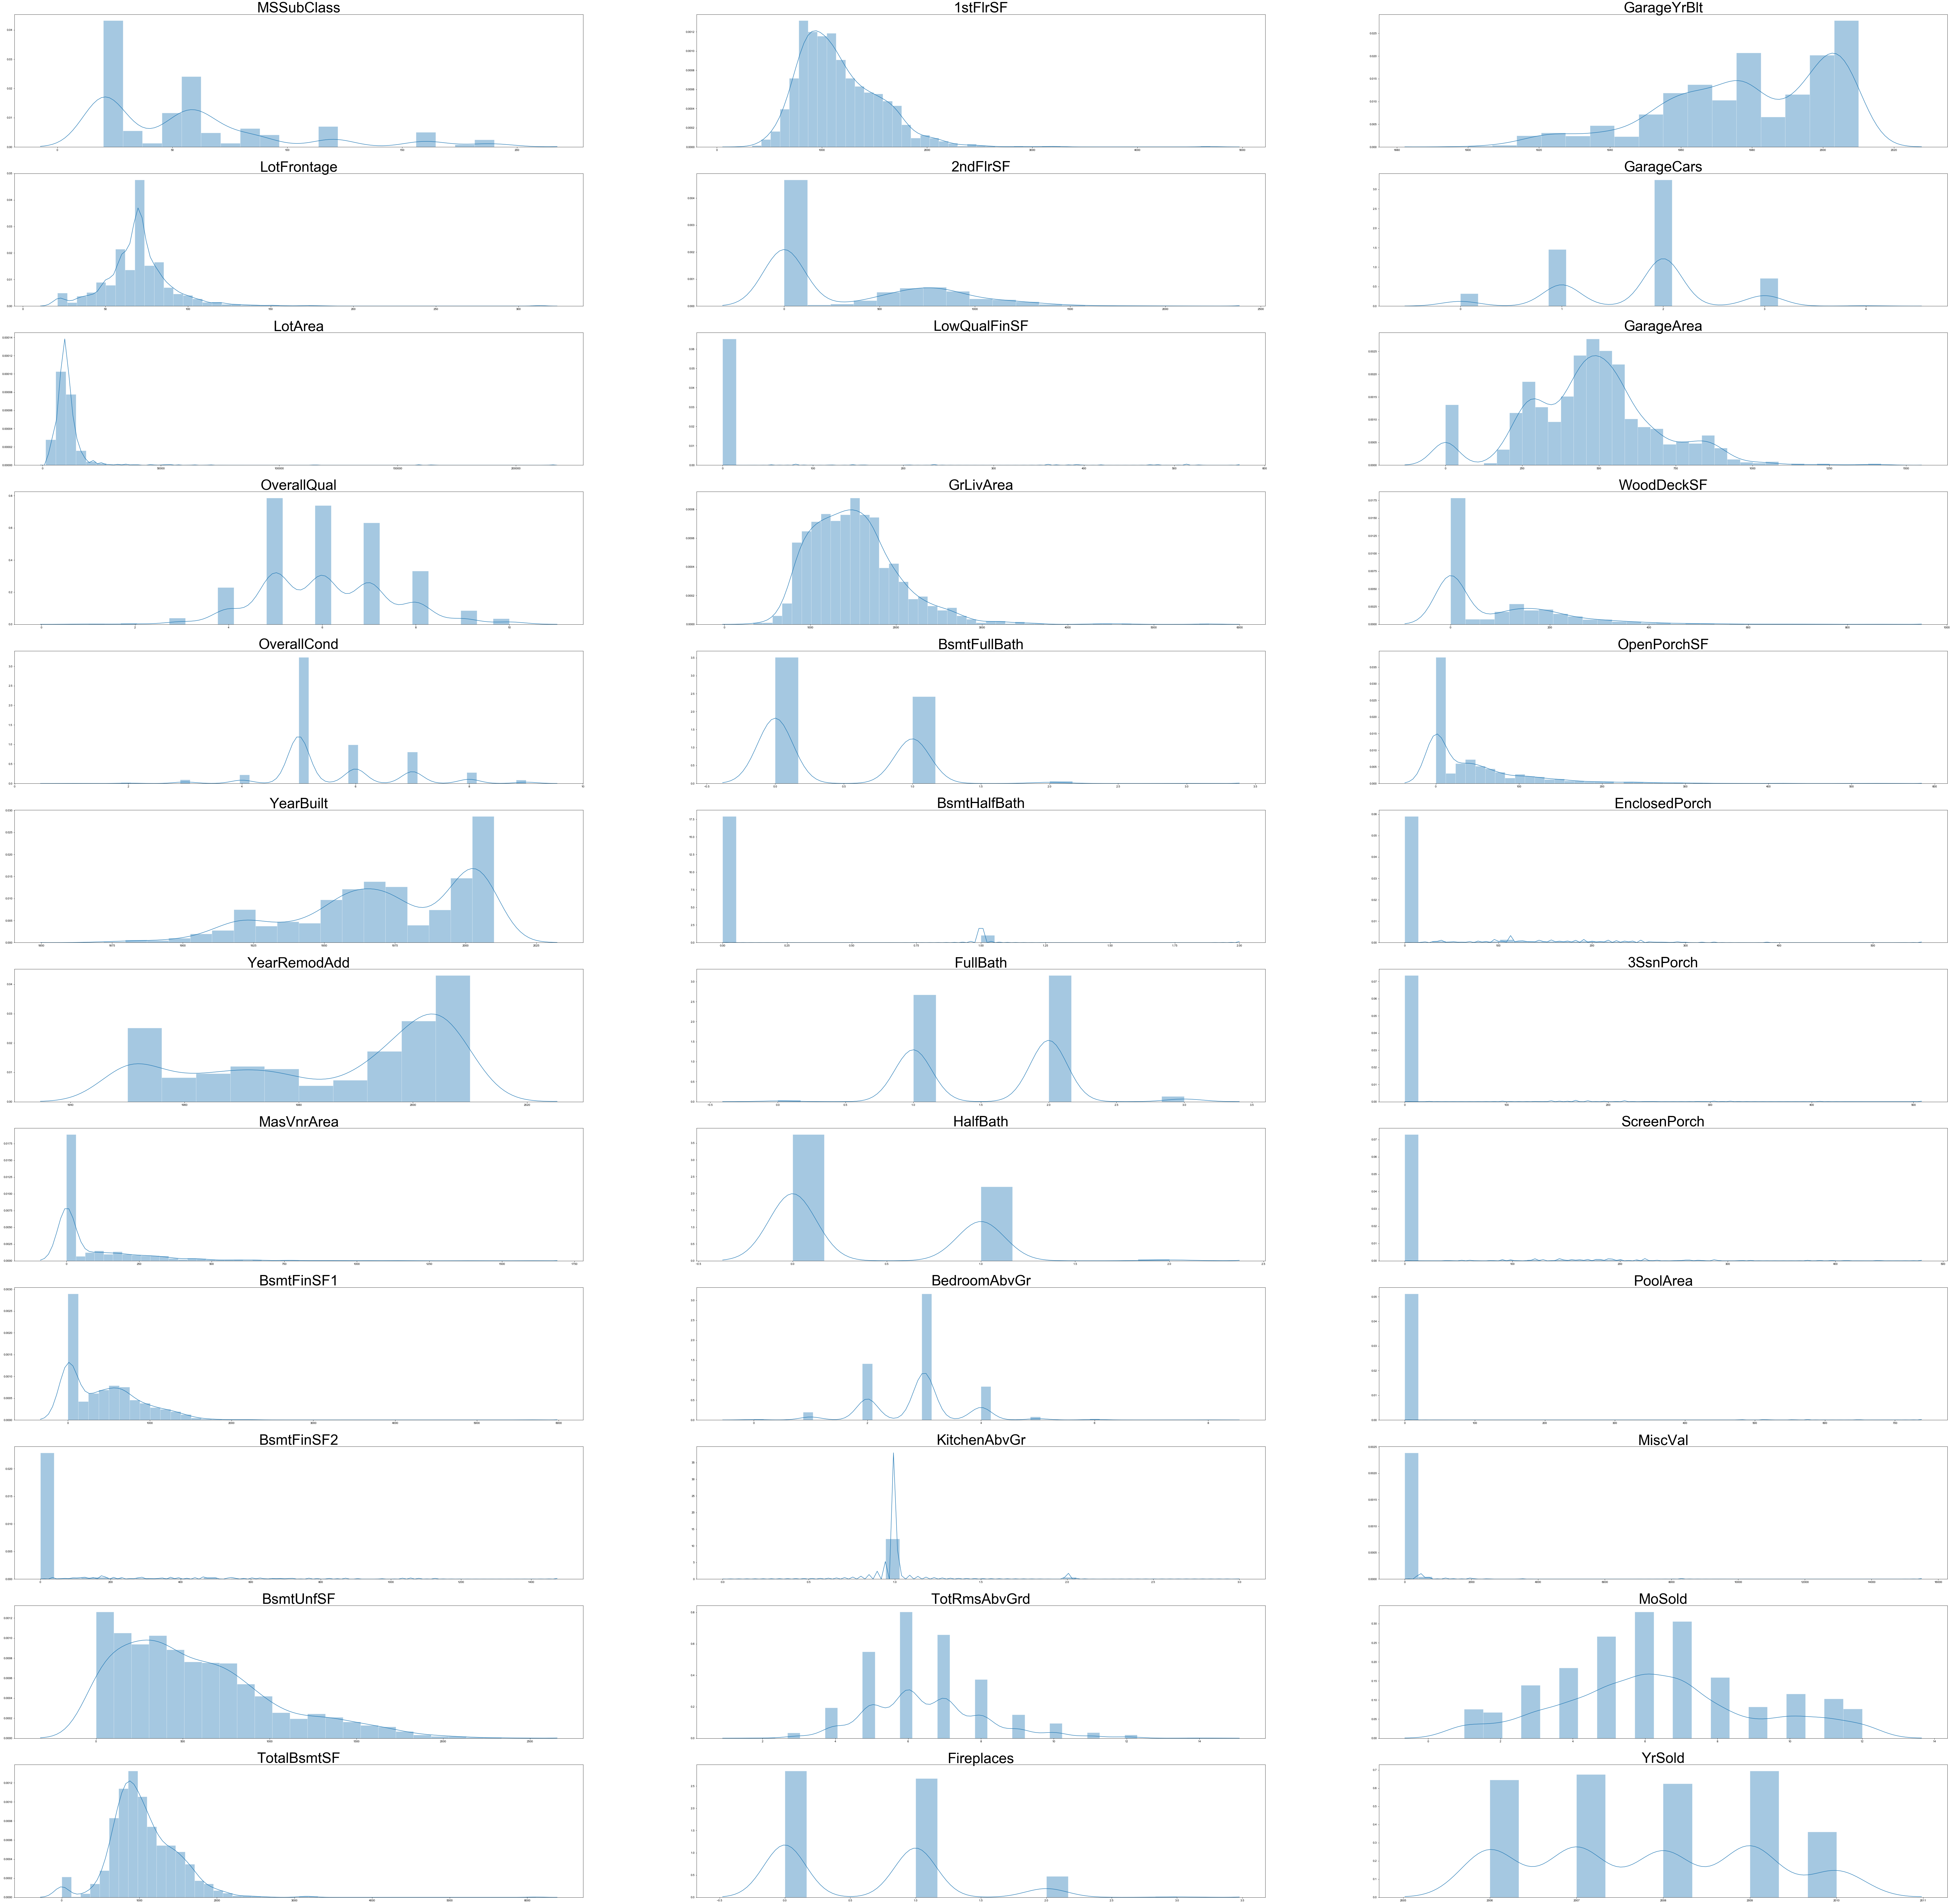

In [5]:
get_dist_graphs(train)

#### Do you notice anything?    
#### Is something that you think might require special treatment (comment what it is, you’re not required to try to fix it).

First of all, we got NaN values, which we have to fix. For this, we used median imputation. Also, a lot of the variables are categorical, despite being numeric. The distribution is interesting to know nevertheless. However, we would probably have to do One-hot encoding or a similar algorithm to actually utilize the data before predicting something.

#### Visualize the dependency of the target on each continuous feature (2d scatter plot).

In [22]:
get_scatter_graphs(train)

IndexError: list index out of range

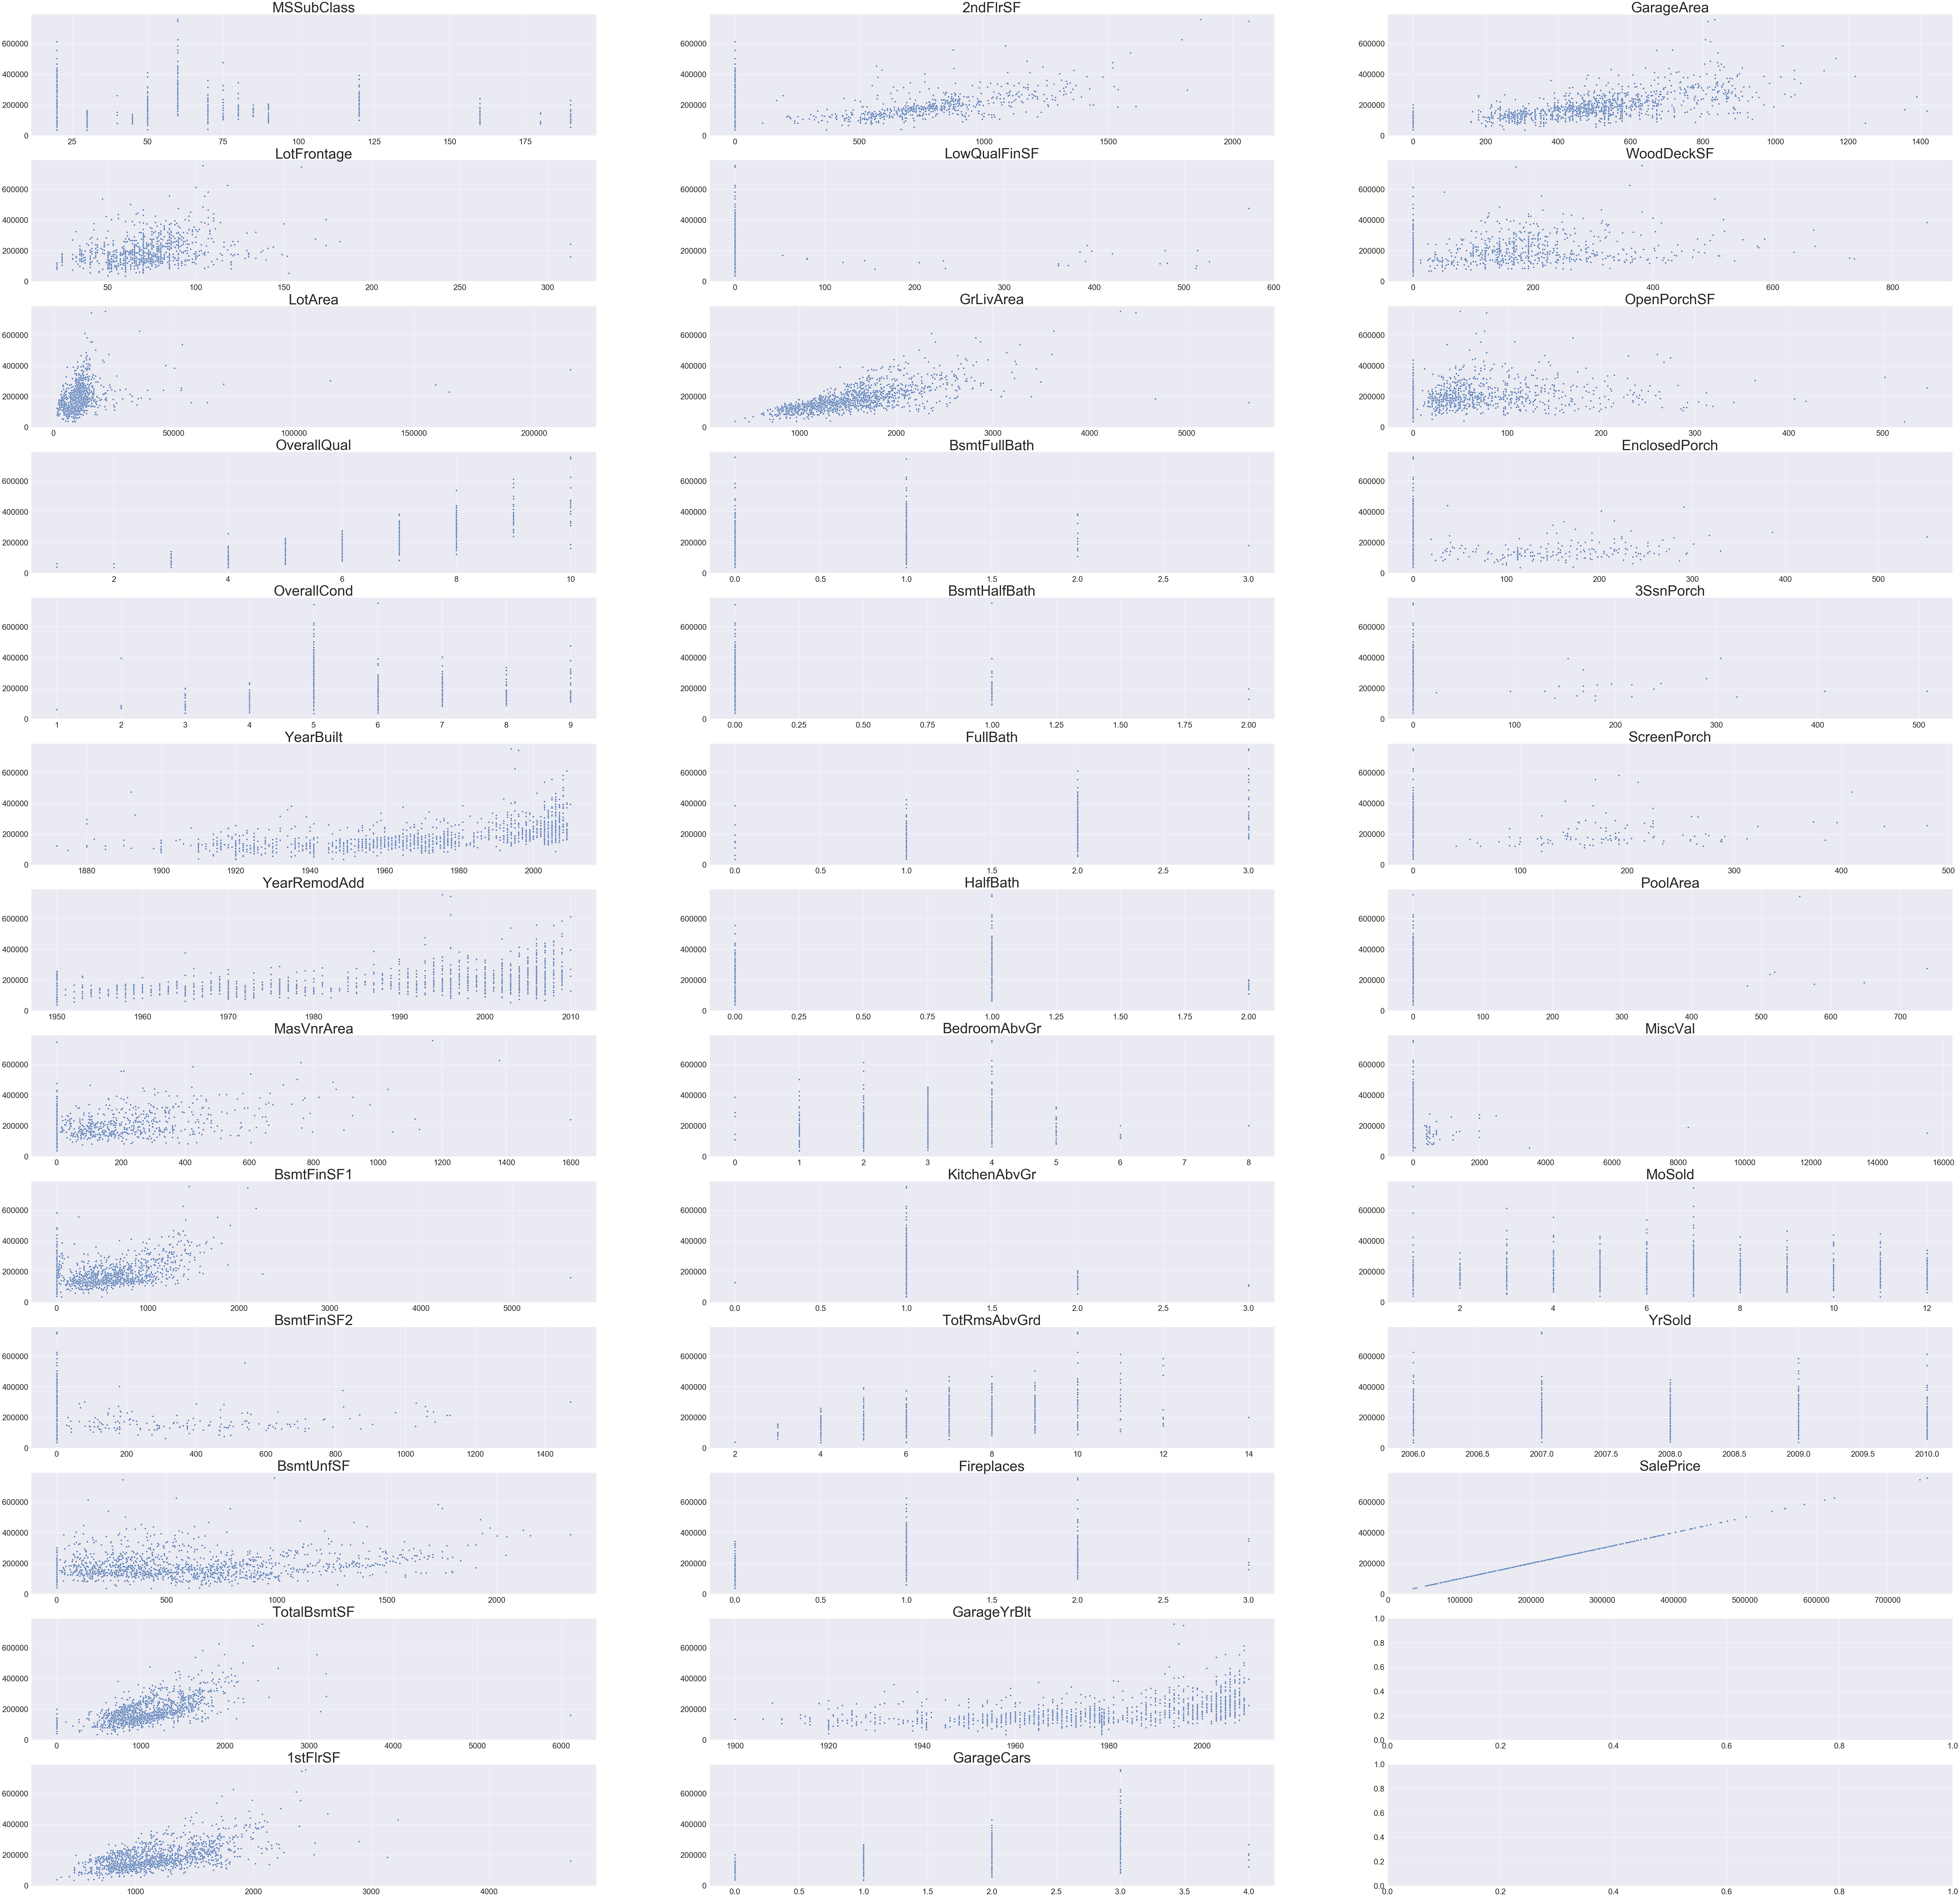

In [23]:
plt.show()

#### Split data in training and test set. 


In [5]:
train = train.fillna(train.mean())
    
# Lets get X and Y
X_train = train.drop('SalePrice', axis =1)
y_train = train.SalePrice

# Lets get X and Y
X_test = test

#### For each categorical variable, cross-validate a Linear Regression model using just this variable (one-hot-encoded).   


In [34]:
top3 = top3_r2(X_train,y_train)

Gettin R squared values... 

LotArea: 	0
OverallQual: 	0.6749581069301912
OverallCond: 	0
YearBuilt: 	0
YearRemodAdd: 	0.23379336977542406
MasVnrArea: 	0
BsmtFinSF1: 	0
BsmtFinSF2: 	0
BsmtUnfSF: 	0
TotalBsmtSF: 	0
1stFlrSF: 	0
2ndFlrSF: 	0
LowQualFinSF: 	0
GrLivArea: 	0
BsmtFullBath: 	0
BsmtHalfBath: 	0
FullBath: 	0.32478335297068694
HalfBath: 	0.08511053547175837
BedroomAbvGr: 	0
KitchenAbvGr: 	0
TotRmsAbvGrd: 	0
Fireplaces: 	0.22133229033015317
GarageYrBlt: 	0
GarageCars: 	0.48320098162903447
GarageArea: 	0
WoodDeckSF: 	0
OpenPorchSF: 	0
EnclosedPorch: 	0
3SsnPorch: 	0
ScreenPorch: 	0
PoolArea: 	0
MiscVal: 	0
MoSold: 	0
YrSold: 	0

The top 3 categorical variables are: 

OverallQual with an R squared of: 0.6749581069301912

GarageCars with an R squared of: 0.48320098162903447

FullBath with an R squared of: 0.32478335297068694



#### Visualize the three categorical variables that provide the best R^2 value.

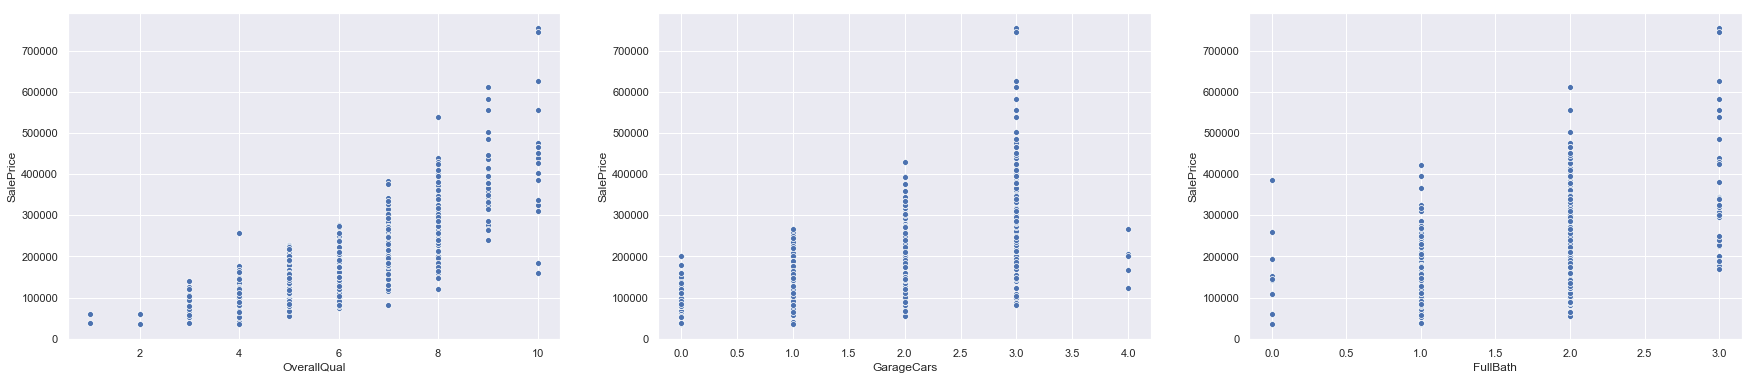

In [36]:
top3_graphs(train,top3)

#### Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.  

In [37]:
regressions(train)


Linear Regression score is:  -0.08085988366142069 

Ridge score is:  0.6919964115659021 

Lasso score is:  0.4512406394769329 

ElasticNet score is:  0.7293768580133385 



#### Tune the parameters of the models using GridSearchCV.   

In [6]:
grid_LR,grid_R,grid_L,grid_EN = regression_w_GS(train)

			 Linear Regression: 

{'linearregression__fit_intercept': False, 'linearregression__normalize': True} 	 score:  0.9332685455748608 

			 Ridge: 

{'ridge__alpha': 31.622776601683793} 	 score:  0.8886187664943519 

			 Lasso: 

{'lasso__alpha': 100.0} 	 score:  0.9159258849076758 

			 ElasticNet: 

{'elasticnet__alpha': 0.046415888336127774} 	 score:  0.8882183140633679 



#### Do the results improve?  

The was an improvall overall of around $3-6\%$. There might be some randomness added to that, but I believe that the improvements are largely due to the GridSearch. Overall, the scores are incredibly high, which is quite cool.

#### Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

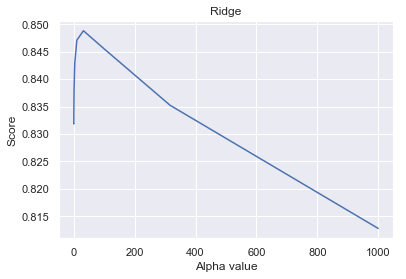

In [7]:
x_R = np.logspace(-3, 3, num=13)
y_R = grid_R.cv_results_['mean_test_score']

sns.set(font_scale= 1)
g = sns.lineplot(x = x_R, y = y_R)
g.set(xlabel='Alpha value',ylabel='Score')
g.set_title('Ridge')

plt.show()

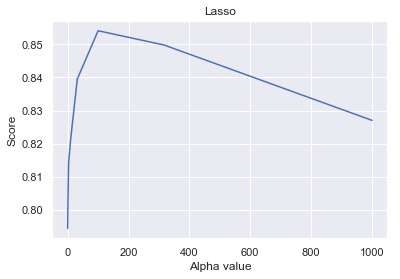

In [8]:
x_L = np.logspace(-3, 3, num=13)
# x_L = [0.001,0.01,0.02,0.03,0.04,0.06,0.08,1,1.2,1.5,2,2.5,3,5,8,10]
y_L = grid_L.cv_results_['mean_test_score']

sns.set(font_scale= 1)
g = sns.lineplot(x = x_L, y = y_L)
g.set(xlabel='Alpha value',ylabel='Score')
g.set_title('Lasso')

plt.show()

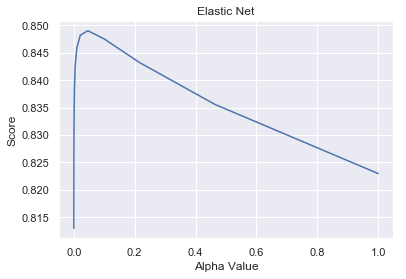

In [9]:
x_EN = np.logspace(-4, 0, 13)
y_EN = grid_EN.cv_results_['mean_test_score']

sns.set(font_scale= 1)
g = sns.lineplot(x = x_EN, y = y_EN)
g.set(xlabel='Alpha Value',ylabel='Score')
g.set_title('Elastic Net')

plt.show()

## 1.6

## Visualize the coefficients of the resulting models. 

We will take the top n coefficients.

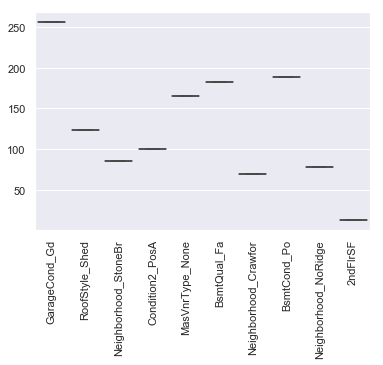

In [45]:
viz_top_features(X_train,grid_L,'lasso',10)

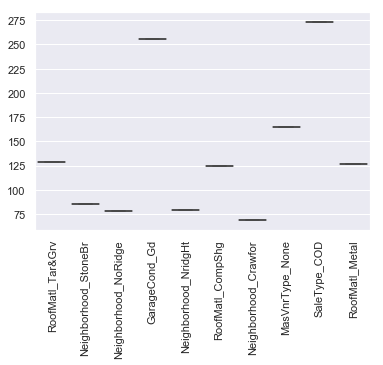

In [46]:
viz_top_features(X_train,grid_R,'ridge',10)

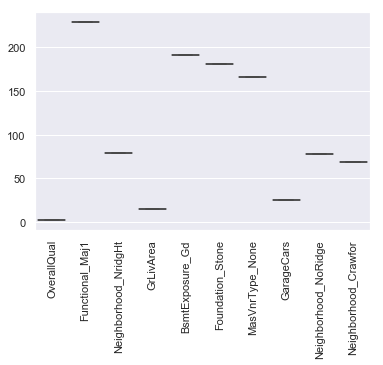

In [47]:
viz_top_features(X_train,grid_EN,'elasticnet',10)

#### Do they agree on which features are important?

In [48]:
graph_top_features(X_train,grid_L,'lasso',10)

['GarageCond_Gd',
 'RoofStyle_Shed',
 'Neighborhood_StoneBr',
 'Condition2_PosA',
 'MasVnrType_None',
 'BsmtQual_Fa',
 'Neighborhood_Crawfor',
 'BsmtCond_Po',
 'Neighborhood_NoRidge',
 '2ndFlrSF']

In [49]:
graph_top_features(X_train,grid_R,'ridge',10)

['RoofMatl_Tar&Grv',
 'Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'GarageCond_Gd',
 'Neighborhood_NridgHt',
 'RoofMatl_CompShg',
 'Neighborhood_Crawfor',
 'MasVnrType_None',
 'SaleType_COD',
 'RoofMatl_Metal']

In [50]:
graph_top_features(X_train,grid_EN,'elasticnet',10)

['OverallQual',
 'Functional_Maj1',
 'Neighborhood_NridgHt',
 'GrLivArea',
 'BsmtExposure_Gd',
 'Foundation_Stone',
 'MasVnrType_None',
 'GarageCars',
 'Neighborhood_NoRidge',
 'Neighborhood_Crawfor']

We can see that we have some overlap, for instance, Neighborhood seems to be important in all of them. Also Floor, and Roof, even pool in the first two!   
Also, it is very interesting to see that Overall quality was not seen at all despite being the highest R squared in a previous question. After running the code again, it appeared once in the elasticnet model.